# Problem_3_4

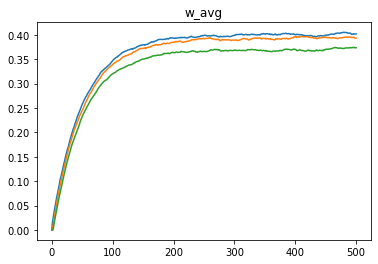

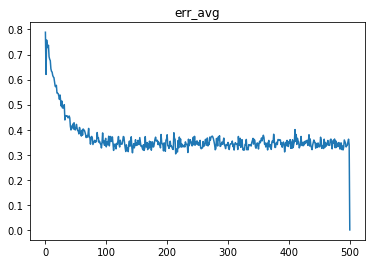

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Feb 11 23:43:09 2020

@author: Lenovo
"""

import h5py
import numpy as np
import matplotlib.pyplot as plt

def LMS(v, z, eta):
    w = np.zeros([np.shape(v)[0], 3])
    err = np.zeros(np.shape(v)[0])
    y = np.zeros(np.shape(v)[0])
    for i in range(1, np.shape(v)[0]):
        y[i - 1] = np.sum(w[i - 1, :] * v[i - 1, :])
        err[i - 1] = z[i - 1] - y[i - 1]
        w[i] = w[i - 1] + eta * err[i - 1] * v[i - 1]
    
    return w, np.square(err)

model = h5py.File('D:\EE599\HW2\lms_fun_v3.hdf5','r')
mismatched_x = model['mismatched_x'][:]
mismatched_y = model['mismatched_y'][:]
mismatched_v = model['mismatched_v'][:]

eta = 0.02
w = np.zeros(np.shape(mismatched_v))
err = np.zeros([np.shape(mismatched_v)[0], np.shape(mismatched_v)[1]])

for i in range(np.shape(mismatched_v)[0]):
    w[i], err[i] = LMS(mismatched_v[i], mismatched_y[i], eta)

w_avg = np.average(w, axis=0)
err_avg = np.average(err, axis=0)
plt.figure()
plt.plot(w_avg[:,0])
plt.plot(w_avg[:,1])
plt.plot(w_avg[:,2])
plt.title("w_avg")

plt.figure()
plt.plot(err_avg)
plt.title("err_avg")

rn = np.zeros(np.shape(mismatched_v))
for i in range(np.shape(mismatched_v)[0]):
    rn[i] = mismatched_v[i] * mismatched_y[i, None].T

exp_rn = np.average(np.average(rn, axis=0), axis=0)

Rvn = np.zeros([np.shape(mismatched_v)[0], np.shape(mismatched_v)[1], np.shape(mismatched_v)[2], np.shape(mismatched_v)[2]])
for i in range(np.shape(mismatched_v)[0]):
    for j in range(np.shape(mismatched_v)[1]):
        Rvn[i, j] = mismatched_v[i, j] * (mismatched_v[i, j].reshape(mismatched_v[i, j].shape[0], 1))

exp_Rvn = np.average(np.average(Rvn, axis=0), axis=0)

w = np.linalg.inv(exp_Rvn)@exp_rn


LLSE = np.zeros([np.shape(mismatched_v)[0], np.shape(mismatched_v)[1]])
for i in range(np.shape(mismatched_v)[0]):
    for j in range(np.shape(mismatched_v)[1]):
        LLSE[i, j] = (mismatched_v[i, j] @ w) * (w.T @ (mismatched_v[i, j].reshape(mismatched_v[i, j].shape[0], 1))) \
            - 2 * (mismatched_v[i, j] @ w * mismatched_y[i, j]) \
            +  mismatched_y[i, j] * mismatched_y[i, j]
            
exp_LLSE = np.average(np.average(LLSE, axis=0), axis=0) # 0.33

In [3]:
print('R_vn:')
print(exp_Rvn)

R_vn:
[[ 1.00045756e+00 -5.39002475e-04  1.86487799e-03]
 [-5.39002475e-04  9.98711657e-01 -6.55304895e-04]
 [ 1.86487799e-03 -6.55304895e-04  9.96783998e-01]]


In [4]:
print('r_n:')
print(exp_rn)

r_n:
[0.401296   0.38678905 0.3700655 ]


In [5]:
print('LLSE:')
print(exp_LLSE)

LLSE:
0.3311129441273168


The theoretical LLSE is lower than that of LMS output.